# Conditional Graph

Objectives:

    1. Implement conditional logic to route the flow of data to different nodes

    2. Use START and END nodes to manage entry and exit points explicitly.

    3. Design multiple nodes to perform different operations (addition, subtraction).

Create a router node to handle decision-making and control gras' flow.

Main Goal: How to use "add_conditional_edges()"

In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
    number1 : int 
    operation : str
    number2 : int
    finalNumber : int

In [6]:
def adder(state:AgentState) -> AgentState:
    """This node adds the 2 numbers"""
    state["finalNumber"] = state["number1"] + state["number2"]
    return state

def subtractor(state:AgentState) -> AgentState:
    """This node subtract the 2 numbers"""
    state["finalNumber"] = state['number1'] - state["number2"]
    return state

def decide_next_node(state:AgentState) -> AgentState:
    """This node will select the next node of the graph"""
    
    if state['operation'] == "+":
        return "additional_operation"
    
    elif state['operation'] == "-":
        return "substration_operation"
    
    

In [9]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state:state) # passthrough function, the state will be input and the state will be the output as well

graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        "additional_operation" : "add_node",
        "substration_operation" : "subtract_node"
    }
)

graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)
app = graph.compile()

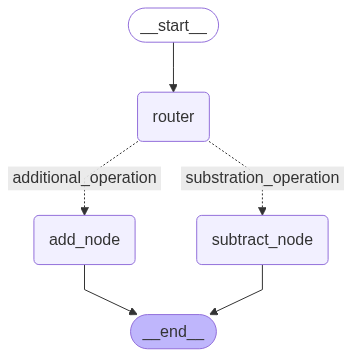

In [10]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [11]:
initial_state1 = AgentState(number1 = 10, operation= "-", number2 =5)
print(app.invoke(initial_state1))

{'number1': 10, 'operation': '-', 'number2': 5, 'finalNumber': 5}


In [13]:
initial_state2 = AgentState(number1 = 10, operation= "+", number2 =5)
print(app.invoke(initial_state2))

{'number1': 10, 'operation': '+', 'number2': 5, 'finalNumber': 15}
